## HW_3_ASSIGNMENT 3 
### Author Anita Ahmed - ama908@nyu.edu
#### Other Team Members : Erwan LeCun, Miyabi Ishihara

### PROPOSAL
#### We want to test if in any given month the averge tripduration per customer (u1) and averge tripduration per subscribers(u2) are equal

#### Sample used : January 2015, Citibike data

#### Null Hypothesis: The averge tripduration per customer (u1) and averge tripduration persubscribers(u2), in are equal at a significnace level p = 0.025
##### Ho: u1-u2 = 0
#### Alternetive Hypothesis: The averge tripduration per customer (u1) and averge tripduration persubscribers(u2)
##### H1: u1-u2 ≠ 0
##### α =0.025

Populating the interactive namespace from numpy and matplotlib


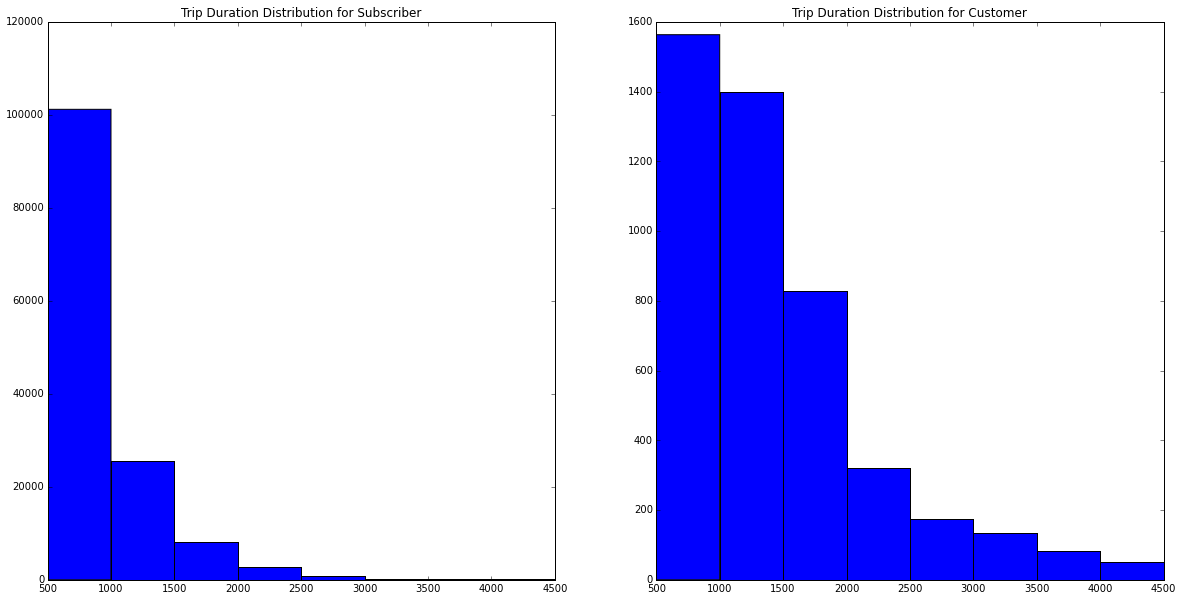

In [22]:
#IMPORTING PACKAGES
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import os
import json
from zipfile import ZipFile
from StringIO import StringIO
import urllib2

%pylab inline

#Reading The CSV File for the month of Januray, 2015 
r = urllib2.urlopen("https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip").read()
file = ZipFile(StringIO(r))
citibike_csv = file.open("201501-citibike-tripdata.csv")
df = pd.read_csv(citibike_csv)

# Separating Usertypes by creating array
trip_subscriber = []
trip_customer = []

# Creating seprate tripduration array per usertype
for index, row in df.iterrows():
        if row['usertype'] == 'Subscriber':
                trip_subscriber.append(row['tripduration'])
        elif row['usertype'] == 'Customer':
                trip_customer.append(row['tripduration'])

# Visalizing Trip Duration for each usertype
bins = range(500, 5000, 500)
trip_subscriber = np.array(trip_subscriber)
trip_customer = np.array(trip_customer)
fig = pl.figure(figsize=[20,10])
ax1 = fig.add_subplot(121)
ax1.hist(trip_subscriber, bins = bins)
ax2 = fig.add_subplot(122)
ax2.hist(trip_customer, bins = bins)
ax1.set_title('Trip Duration Distribution for Subscriber')
ax2.set_title('Trip Duration Distribution for Customer')
pl.show()

#####CONDUTCING Z-test
###### x1= sample mean tripduration for Customers
######x2= sample mean tripduration for Subscribers
###### u1= population mean tripduration for Customers
###### u2= population mean tripduration for Subscribers
###### o1= sample variance tripduration for Customers
###### o2= sample variance tripduration for Subscribers
###### n1= sample size for Customers
###### n2= sample size for Subscribers

In [23]:
alpha = 0.025
z_test = lambda x1, x2, u1, u2, o1, o2, n1, n2: ((x1 - x2) - (u1 - u2)) / np.sqrt((o1 / n1) + (o2 / n2))
z_sample = z_test(np.average(trip_customer), np.average(trip_subscriber), 0, 0, np.var(trip_customer), np.var(trip_subscriber), len(trip_customer), len(trip_subscriber))
print 'The z-score of the distribution is:',z_sample

The z-score of the distribution is: 33.7877558335


In [31]:
# For two tailed z-test,we select α=0.025, the critical z-value is 1.96. 
z_critical = 1.96
def report_result(z_sample,z_critical):
    print 'is the z value {0:.2f} smaller than the critical value {1:.2f}? '.format(z_sample,z_critical)
    if z_sample<z_critical:
        print "YES!"
    else: print "NO!"
    
    print 'the Null hypothesis is {}'.format( 'rejected' if z_sample<z_critical  else 'not rejected') 
    
report_result(z_sample,z_critical)

is the z value 33.79 smaller than the critical value 1.96? 
NO!
the Null hypothesis is not rejected


#####The Z score was very large as the sample sizes of subscriber sample size is significantly larger than the customer sample size. So we decided to conduct the K-S test to see if the two disttribution come form the same parent distribution. Used used a significance level of 0.05

In [25]:
ks = scipy.stats.ks_2samp(trip_subscriber, trip_customer)
print 'The KS statistics is:',ks


The KS statistics is: (0.46182684553824527, 0.0)


In [33]:
# From the results p=0.0
p=0.0


def report_result(p,a):
    print 'is the p value {0:.2f} smaller than the critical value {1:.3f}? '.format(p,a)
    if p<a:
        print "YES!"
    else: print "NO!"
    
    print 'the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') 

    
report_result(p,alpha)

is the p value 0.00 smaller than the critical value 0.025? 
YES!
the Null hypothesis is rejected
